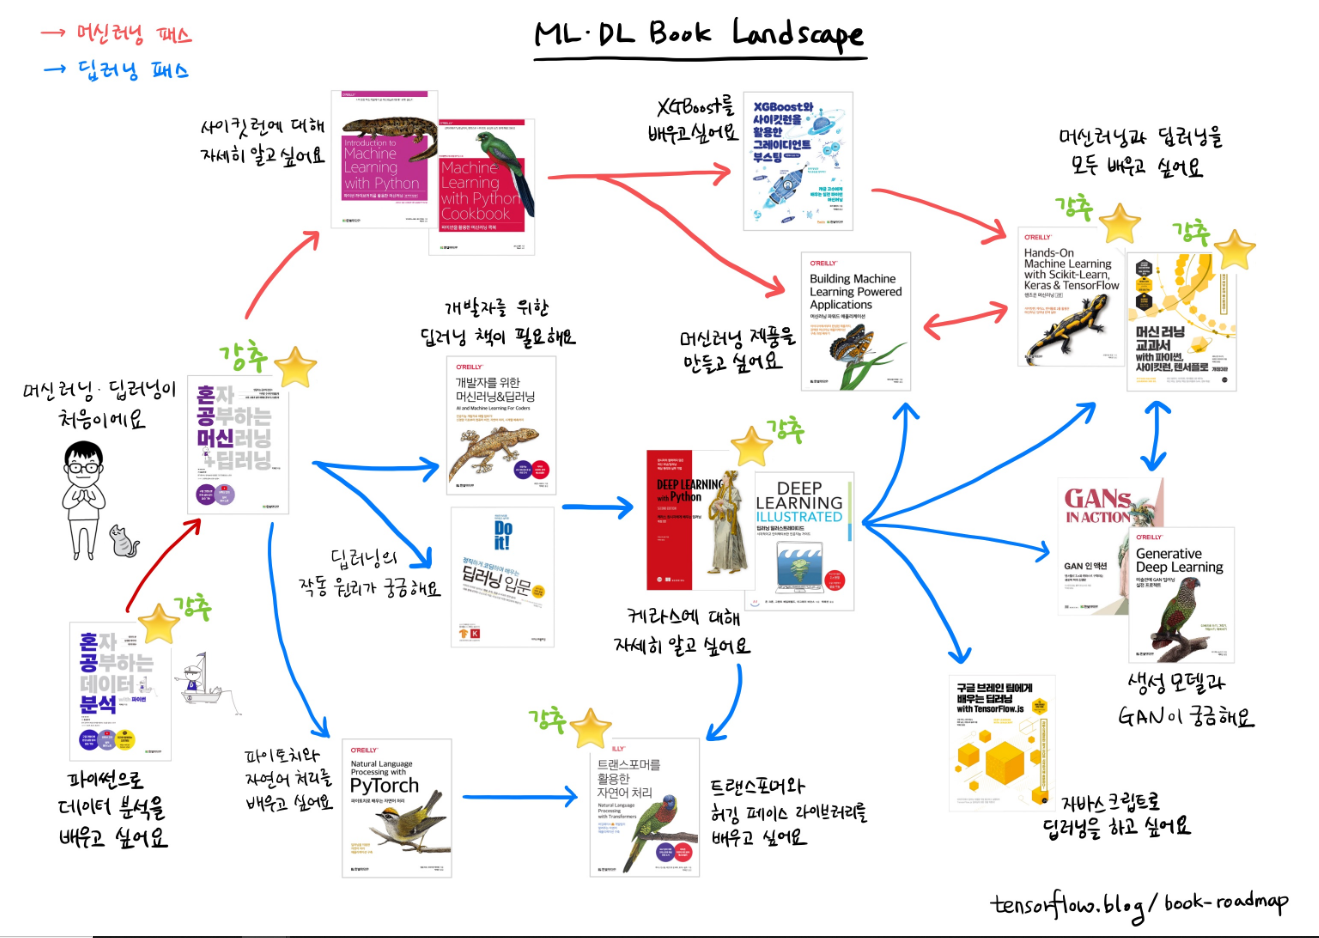

## 1. 데이터셋

In [3]:
from keras.datasets import imdb

## num_words = 10000 매개변수는 훈련 데이터에서 가장 자주 나타나는 단어 1만개만 사용
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17464789/17464789 [==============================] - 0s 0us/step


In [4]:
print('Review data 1번째 출력:', train_data[0])
print('Review data 1번째 길이:', len(train_data[0]))
print('Review data 2번째 길이:', len(train_data[1]))
print('Review data 갯수:', len(train_data))

Review data 1번째 출력: [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
Review data 1번째 길이: 218
Review data 2번째 

In [5]:
## 부정: 0 // 긍정: 1
train_labels[0]

1

> 가장 자주 등장하는 단어 1만개로 제한했기 때문에 단어 인덱스는 9999를 넘지 않는다.

In [6]:
max([max(i) for i in train_data])

9999

> 리뷰데이터 하나를 원래 영어 단어로 변경.

In [7]:
word_index = imdb.get_word_index()                                              ## word_index는 단어와 정수 인덱스를 매핑한 딕셔너리

reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])                      ## 정수 인덱스와 단어를 매핑하도록 뒤집는다.

decoded_review = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[1]])                ## 리뷰를 디코딩합니다. 
                                                                                ## 0, 1, 2는 '패딩', '문서 시작', '사전에 없음'을 위한 인덱스이므로 3을 뺍니다

1641221/1641221 [==============================] - 0s 0us/step


In [8]:
decoded_review

"? big hair big boobs bad music and a giant safety pin these are the words to best describe this terrible movie i love cheesy horror movies and i've seen hundreds but this had got to be on of the worst ever made the plot is paper thin and ridiculous the acting is an abomination the script is completely laughable the best is the end showdown with the cop and how he worked out who the killer is it's just so damn terribly written the clothes are sickening and funny in equal ? the hair is big lots of boobs ? men wear those cut ? shirts that show off their ? sickening that men actually wore them and the music is just ? trash that plays over and over again in almost every scene there is trashy music boobs and ? taking away bodies and the gym still doesn't close for ? all joking aside this is a truly bad film whose only charm is to look back on the disaster that was the 80's and have a good old laugh at how bad everything was back then"

## 2. 데이터 준비
- 신경망에 숫자 리스트를 주입할 수는 없다.
- 리스트를 텐서로 바꾸는 2 가지 방법이 있다.
  - **첫번째 방법**,
  
  > 같은 길이가 되도록 리스트에 패딩(padding)을 추가하고

  > (sample, sequence_length) 크기의 정수 텐서로 변환 

  > 정수 텐서를 다룰 수 있는 층을 신경망의 첫 번째층으로 사용(Embedding 층)

  - **두번째 방법**,

  > 리스트를 멀티 원-핫 인코딩으로 0과 1의 벡터로 변환

  > 그 다음 부동 소수 벡터 데이터를 다룰 수 있는 첫 번째 Dense 층 형성.

In [9]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    # 크기가 (len(sequences), dimension))이고 모든 원소가 0인 행렬을 만듭니다
    results = np.zeros((len(sequences), dimension))
    
    for i, sequence in enumerate(sequences):
        for j in sequence:
          results[i, j] = 1.  # results[i]에서 특정 인덱스의 위치를 1로 만듭니다
    
    return results

# 훈련 데이터를 벡터로 변환합니다
x_train = vectorize_sequences(train_data)
# 테스트 데이터를 벡터로 변환합니다
x_test = vectorize_sequences(test_data)

In [10]:
## sample 아래와 같이 확인
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

> 레이블은 아래와 같이 벡터 변환

In [11]:
# 레이블을 벡터로 바꿉니다
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

## 3. 신경망 모델 만들기

### Dense 층을 쌓을 때 두 가진 중요한 구조상의 결정이 필요합니다:

> 1) 얼마나 많은 층을 사용할 것인가

> 2) 각 층에 얼마나 많은 은닉 유닛을 둘 것인가

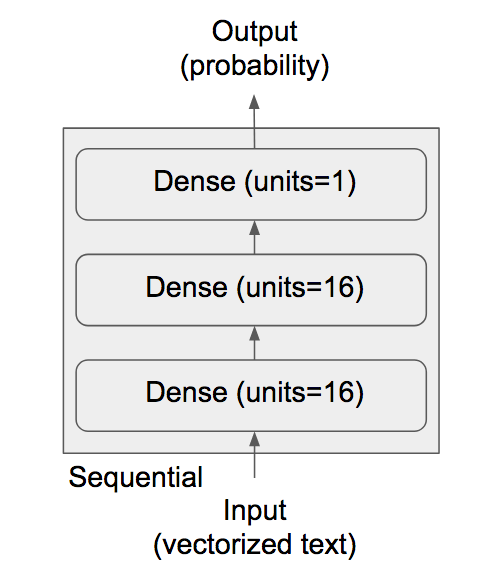

In [12]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

### 손실함수와 옵티마이저 선택
1) binary_crossentropy: 이진 분류

In [13]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

## 4. 훈련 검증
> 훈련 세트와 검증 세트 구분하여 나누

In [14]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

> 512개의 샘플씩 미니 배치를 만들어 20번의 epochs동안 모델 훈련

In [15]:
history = model.fit(partial_x_train, partial_y_train, 
                    epochs=20, batch_size=512, 
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 4s 58ms/step - loss: 0.5206 - accuracy: 0.8055 - val_loss: 0.4007 - val_accuracy: 0.8652
Epoch 2/20
30/30 [==============================] - 1s 23ms/step - loss: 0.3183 - accuracy: 0.9002 - val_loss: 0.3112 - val_accuracy: 0.8848
Epoch 3/20
30/30 [==============================] - 1s 23ms/step - loss: 0.2325 - accuracy: 0.9239 - val_loss: 0.2833 - val_accuracy: 0.8866
Epoch 4/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1787 - accuracy: 0.9433 - val_loss: 0.3176 - val_accuracy: 0.8710
Epoch 5/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1481 - accuracy: 0.9516 - val_loss: 0.2774 - val_accuracy: 0.8887
Epoch 6/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1214 - accuracy: 0.9628 - val_loss: 0.2916 - val_accuracy: 0.8838
Epoch 7/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1006 - accuracy: 0.9695 - val_loss: 0.3258 - val_accuracy: 0.8797
Epoch 8/20
30

> 훈련하는 동안 발생한 모든 정보를 담고 있는 딕셔너리 history 속성 확인 

In [16]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

> matplotlib을 활용하여 훈련과 검증데이터에 대한 손실 확인

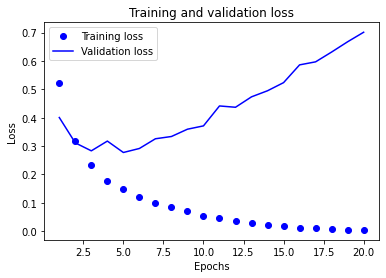

In [17]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

> 훈련과 검증 정확도 그리기

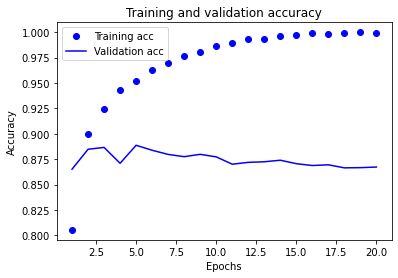

In [18]:
## 그래프를 초기화
plt.clf()                                     

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

> 과대적합(overfitting)
- Training set은 아주 우수하게 최적화 진행
- 하지만, validation set은 4번째 에포크부터 그래프가 역전됨.
- 과대적합을 방지하기 위해, 4번째 에포크 이후에 훈련을 중지할 수 있다.
- fit() 메서드를 재호출하면 학습된 가중치에서 훈련이 이어지므로 모델 객체 새로 생성

In [19]:
model_2 = keras.Sequential()
model_2.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model_2.add(layers.Dense(16, activation='relu'))
model_2.add(layers.Dense(1, activation='sigmoid'))

In [20]:
model_2.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [21]:
model_2.fit(x_train, y_train, epochs=4, batch_size=512)

Epoch 1/4
49/49 [==============================] - 1s 16ms/step - loss: 0.5150 - accuracy: 0.7811
Epoch 2/4
49/49 [==============================] - 1s 14ms/step - loss: 0.2930 - accuracy: 0.9067
Epoch 3/4
49/49 [==============================] - 1s 13ms/step - loss: 0.2143 - accuracy: 0.9281
Epoch 4/4
49/49 [==============================] - 1s 13ms/step - loss: 0.1772 - accuracy: 0.9382


> 최종 결과 확인

In [22]:
results = model_2.evaluate(x_test, y_test)

782/782 [==============================] - 2s 3ms/step - loss: 0.2952 - accuracy: 0.8828


## 5. 훈련된 모델로 새로운 데이터에 대해 예측하기

In [23]:
model_2.predict(x_test)

782/782 [==============================] - 2s 2ms/step


array([[0.13983606],
       [0.99582314],
       [0.74566996],
       ...,
       [0.10801533],
       [0.05503944],
       [0.53158754]], dtype=float32)